# 순수 DS만 전처리 - DS-MOVE ~ DS-YARSIDE

In [14]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime, timedelta
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Container DS perspective.csv')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container Data.csv', 'Container DS Data.csv', 'Container DS perspective.csv', 'Container LD perspective.csv', 'Container perspective.csv', 'Crawling DS Container.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'Dwell Time', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'Outlier DS.csv', 'Outlier LD.csv', 'QC perspective.csv', 'Vessel perspective.csv', 'Weather.csv', '이상치.csv']
feature 항목 :  Index(['Unnamed: 0', 'VESSEL', 'CONTAINER_NO', 'MCHN_ID', 'MCHN_TP_CD',
       'FULL_EMPTY', 'JOB_TYPE', 'POD', 'BLOCK_BAY', 'JOB_START_DT',
       'JOB_END_DT'],
      dtype='object')


,Unnamed: 0,VESSEL,CONTAINER_NO,MCHN_ID,MCHN_TP_CD,FULL_EMPTY,JOB_TYPE,POD,BLOCK_BAY,JOB_START_DT,JOB_END_DT
0,1,ALAP-001/2018,AXIU1484082-2,GC112,QC,F,DS-QUAYSIDE,KRPUS,1B-38,20180131211752,20180131211924
1,2,ALAP-001/2018,AXIU1484082-2,TC221,TC,F,DS-YARDSIDE,KRPUS,1B-38,20180131213633,20180131213805
2,3,ALAP-001/2018,AXIU1484082-2,YT511,YT,F,DS-MOVE,KRPUS,1B-38,20180131211924,20180131213633
3,7,ALAP-001/2018,BGBU5060490-3,GC109,QC,F,DS-QUAYSIDE,KRPUS,3F-69,20180131205748,20180131205920
4,8,ALAP-001/2018,BGBU5060490-3,TC266,TC,F,DS-YARDSIDE,KRPUS,3F-69,20180131211132,20180131211304
...,...,...,...,...,...,...,...,...,...,...,...
223759,424301,SXNW-001/2018,UESU4153686-1,TC231,TC,F,DS-YARDSIDE,KRPUS,1C-10,20180129203032,20180129203204
223760,424302,SXNW-001/2018,UESU4153686-1,YT526,YT,F,DS-MOVE,KRPUS,1C-10,20180129201812,20180129203032
223761,424303,SXNW-001/2018,UESU4586161-1,GC110,QC,F,DS-QUAYSIDE,KRPUS,2B-74,20180129201945,20180129202117
223762,424304,SXNW-001/2018,UESU4586161-1,TC224,TC,F,DS-YARDSIDE,KRPUS,2B-74,20180129203317,20180129203449


In [2]:
# 이상치 데이터 걸려내기
outlier_ds = pd.read_csv('Outlier DS.csv', encoding= 'CP949')
oulier_list = list(outlier_ds['Case ID'].unique())

data = data[~data['CONTAINER_NO'].isin(oulier_list)]
print(len(data['CONTAINER_NO'].unique()))

74553


이제야 비로소 74533개!!!!

In [3]:
# 데이터 프레임 Datetime 변환
data['JOB_START_DT'] = data['JOB_START_DT'].astype('str')
data['JOB_END_DT'] = data['JOB_END_DT'].astype('str')

data['JOB_START_DT'] = pd.to_datetime(data['JOB_START_DT'])
data['JOB_END_DT'] = pd.to_datetime(data['JOB_END_DT'])

C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JOB_START_DT'] = data['JOB_START_DT'].astype('str')
C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JOB_END_DT'] = data['JOB_END_DT'].astype('str')
C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223644 entries, 0 to 149400
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CONTAINER_NO     223644 non-null  object        
 1   VESSEL           223644 non-null  object        
 2   MCHN_ID          223644 non-null  object        
 3   FULL_EMPTY       223644 non-null  object        
 4   JOB_TYPE         223644 non-null  object        
 5   POD              223644 non-null  object        
 6   BLOCK_BAY        223644 non-null  object        
 7   JOB_START_DT     223644 non-null  datetime64[ns]
 8   JOB_END_DT       223644 non-null  datetime64[ns]
 9   CHE_ID           74547 non-null   object        
 10  ITV_ID           74547 non-null   object        
 11  QC_ID            74547 non-null   object        
 12  OUTSERVICE       0 non-null       object        
 13  QUEUE_POSITION   74548 non-null   object        
 14  H_BOX            745

In [5]:
from datetime import datetime
start_time = datetime(2017, 1, 1)
end_time = datetime(2018, 2, 1)

# 1월 1일부터 1월 31일까지 데이터 정제
for_integrated_df = pd.DataFrame(columns=data.columns)
for container in tqdm(list(data['CONTAINER_NO'].unique()), desc = "1월 1일부터 1월 31일까지 데이터 추출 중") :
    temp = data[data['CONTAINER_NO'] == container].reset_index(drop=True)
    if((temp.loc[0, "JOB_START_DT"] > start_time) and (temp.loc[2,"JOB_END_DT"] < end_time)) :
        for_integrated_df = pd.concat([for_integrated_df, temp])
dtd = for_integrated_df['CONTAINER_NO'].value_counts()

1월 1일부터 1월 31일까지 데이터 추출 중: 100%|██████████| 74553/74553 [33:39<00:00, 36.91it/s]  


In [15]:
data = for_integrated_df.copy()

74551개

In [7]:
#! 이거는 케이스 2에서
# Gate perspective에서 연결되지 못하는 DS만 추출

gate_data = pd.read_csv('GO perspective.csv')

gate_data.drop('Variant', axis = 1, inplace = True)
gate_data.drop('Variant index', axis = 1, inplace = True)

gate_data.rename(columns = {'Case ID':'CONTAINER_NO',
                       'Activity':'JOB_TYPE',
                       'Start Timestamp': 'JOB_START_DT',
                       'Complete Timestamp' : 'JOB_END_DT'},
                        inplace=True)

In [16]:
# DS의 컨테이너 ID
total_unique_container_list = list(data['CONTAINER_NO'].unique())
print(len(total_unique_container_list))

#! 이전에 통합한 순수 DS와 DS to LD 호출
# 다행히... 예전에 코딩해놔서 다행이네... 아닌거같은데? 이거 쓰면 더 어려울거같은데?
integrated_ds = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DS.csv', encoding='CP949')
integrated_ds = integrated_ds[integrated_ds['JOB_TYPE'].str.startswith('DS')]
print(len(integrated_ds))
integrated_ds_to_ld = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DStoLD.csv', encoding='CP949')
integrated_ds_to_ld = integrated_ds_to_ld[integrated_ds_to_ld['JOB_TYPE'].str.startswith('DS')]
print(len(integrated_ds_to_ld))

compare_df = pd.concat([integrated_ds, integrated_ds_to_ld])
compare_container_list = list(compare_df['CONTAINER_NO'].unique())

74551
148950
74700


C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\3794368618.py:10: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  integrated_ds_to_ld = pd.read_csv('C:/Users/hyunj/Dropbox/종합설계프로젝트/중요/데이터/Dwell Time/통합/Integrated DStoLD.csv', encoding='CP949')


In [24]:
# 크롤링한 컨테이너 정보 호출
crawling_ds_container = pd.read_csv('Crawling DS Container.csv', encoding='CP949')

# 크롤링한 날씨 정보 호출
crawling_weather = pd.read_csv('Weather.csv', encoding='CP949')

# 데이트타임 변환
crawling_ds_container['JOB_START_DT'] = crawling_ds_container['JOB_START_DT'].astype('str')
crawling_ds_container['JOB_END_DT'] = crawling_ds_container['JOB_END_DT'].astype('str')
crawling_ds_container['JOB_START_DT'] = pd.to_datetime(crawling_ds_container['JOB_START_DT'])
crawling_ds_container['JOB_END_DT'] = pd.to_datetime(crawling_ds_container['JOB_END_DT'])

crawling_weather['일시'] = crawling_weather['일시'].astype('str')
crawling_weather['일시'] = pd.to_datetime(crawling_weather['일시'])

crawling_weather['DAY'] = crawling_weather['일시'].dt.day
crawling_weather['TIME'] = crawling_weather['일시'].dt.hour

#! 이상하게 concat이나 merge하면 원하는 의도가 안 나옴
# compare_df = pd.concat(compare_df, crawling_ds_container, on='CONTAINER_NO')

In [10]:
crawling_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         745 non-null    int64         
 1   지점명        745 non-null    object        
 2   일시         745 non-null    datetime64[ns]
 3   기온(°C)     745 non-null    float64       
 4   풍향(deg)    745 non-null    float64       
 5   풍속(m/s)    745 non-null    float64       
 6   강수량(mm)    745 non-null    float64       
 7   현지기압(hPa)  0 non-null      float64       
 8   해면기압(hPa)  0 non-null      float64       
 9   습도(%)      745 non-null    float64       
 10  DAY        745 non-null    int64         
 11  TIME       745 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 70.0+ KB


In [20]:
data = compare_df[compare_df['CONTAINER_NO'].isin(total_unique_container_list)]
print(len(data['CONTAINER_NO'].unique()))

74548


In [23]:
# 데이터 프레임 Datetime 변환
data['JOB_START_DT'] = data['JOB_START_DT'].astype('str')
data['JOB_END_DT'] = data['JOB_END_DT'].astype('str')

data['JOB_START_DT'] = pd.to_datetime(data['JOB_START_DT'])
data['JOB_END_DT'] = pd.to_datetime(data['JOB_END_DT'])

C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JOB_START_DT'] = data['JOB_START_DT'].astype('str')
C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JOB_END_DT'] = data['JOB_END_DT'].astype('str')
C:\Users\hyunj\AppData\Local\Temp\ipykernel_23176\1036344252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [27]:
# TIP 계산하기 위한 DS-MOVE 집합
ds_move_df = data[data['JOB_TYPE'] == 'DS-MOVE'].reset_index(drop=True)
ds_move_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74548 entries, 0 to 74547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTAINER_NO     74548 non-null  object        
 1   VESSEL           74548 non-null  object        
 2   MCHN_ID          74548 non-null  object        
 3   FULL_EMPTY       74548 non-null  object        
 4   JOB_TYPE         74548 non-null  object        
 5   POD              74548 non-null  object        
 6   BLOCK_BAY        74548 non-null  object        
 7   JOB_START_DT     74548 non-null  datetime64[ns]
 8   JOB_END_DT       74548 non-null  datetime64[ns]
 9   CHE_ID           74547 non-null  object        
 10  ITV_ID           74547 non-null  object        
 11  QC_ID            74547 non-null  object        
 12  OUTSERVICE       0 non-null      object        
 13  QUEUE_POSITION   0 non-null      object        
 14  H_BOX            0 non-null      float

In [42]:
couldnot_crawl_num = 0

# 데이터 프레임을 다시 학습할 수 있도록 데이터를 변환
#! 사용한 Feature들은 파워포인트 참고

container_list = list(data['CONTAINER_NO'].unique())
# 여기에서 DWELL TIME은 Storage Time을 제외한 Moving Time만을 의미 
# 빈 데이터 프레임 생성(최종 사용할 데이터)
last_df = pd.DataFrame(columns=["CONTAINER_NO", "VESSEL_ID", "COUNTRY_POD", "CITY_POD", "Full/Empty", "BLOCK", "BAY", 
                                "YC_ID", "YT_ID", "QC_ID", "QUEUE_POSITION_NUMBER", "QUEUE_POSITION_HACK_DACK", "H_BOX",
                                "WEIGHT", "SIZE", "FREEZE", "IMDG", "UNNO", "CARGO_MANAGEMENT_NUM", "SEAL_NUM", "COMPANY", "IMPORT/EXPORT", "T/S",
                                "TEMPERATURE", "HUMIDITY", "RAIN", "WIND_SPEED", "PRECIPITATION",
                                # 일일 교통량과 TEU는 이후에 다시 추가                               
                                "DAY", "TRUCK IN PROCESS", "Moving Time"])
i = 0

for container in tqdm(container_list, desc = "학습할 데이터 생성 중~") :
    temp_df = data[data['CONTAINER_NO'] == container].reset_index(drop=True)
    # 크롤링한 container 정보 호출
    crawl_temp_df = crawling_ds_container[crawling_ds_container['CONTAINER_NO'] == container].reset_index(drop=True)
    
    
    #! 먼저 이 데이터가 크롤링한 데이터와 연결이 되는지 확인하기 연결되지 못하면 통합을 하지 않는다
    #! = 우리 데이터에는 있지만 사이트에서는 확인할 수 없던 container & vessel 조합 제거 
    check_crawl = crawl_temp_df.loc[:, ["SIZE", "WEIGHT", "FREEZE", "IMDG", "UNNO", "COMPANY",'IMPORT/EXPORT', 'CARGO MANAGEMENT NUMBER', 'SEAL NUMBER', 'T/S']]
    if(check_crawl.isnull().sum().sum() == 30) :
        couldnot_crawl_num += 1
        print(container, "은 크롤링되지 않았습니다.")
        continue

    #! 데이터가 잘 통합되었는지 데이터 확인
    # CONTAINER_NO 확인
    if (temp_df.loc[0, "CONTAINER_NO"] == temp_df.loc[1, "CONTAINER_NO"] == temp_df.loc[2, "CONTAINER_NO"]) :
        pass 
    else :
        print('컨테이너 데이터 오류')
        break
    
    # VESSEL 확인
    if (temp_df.loc[0, "VESSEL"] == temp_df.loc[1, "VESSEL"] == temp_df.loc[2, "VESSEL"]) :
        pass 
    else :
        print('선박 데이터 오류')
        break
    
    # FULL/EMPTY 확인
    if (temp_df.loc[0, "FULL_EMPTY"] == temp_df.loc[1, "FULL_EMPTY"] == temp_df.loc[2, "FULL_EMPTY"]) :
        pass 
    else :
        print('FULL/EMPTY 데이터 오류')
        break
    
    # POD 확인
    if (temp_df.loc[0, "POD"] == temp_df.loc[1, "POD"] == temp_df.loc[2, "POD"]) :
        pass 
    else :
        print('POD 데이터 오류')
        break
    
    # BLOCK_BAY 확인
    if (temp_df.loc[0, "BLOCK_BAY"] == temp_df.loc[1, "BLOCK_BAY"] == temp_df.loc[2, "BLOCK_BAY"]) :
        pass 
    else :
        print('BLOCK_BAY 데이터 오류')
        break
    
    #! Moving Time 계산
    moving_time = (temp_df.loc[2, "JOB_END_DT"] - temp_df.loc[0, "JOB_START_DT"]).seconds / 60
    
    #! CONTAINER_NO 
    container_no = temp_df.loc[0, "CONTAINER_NO"][:4]
    
    #! VESSEL
    vessel = temp_df.loc[0, "VESSEL"][:4]
    
    #! 장비 IDs & 트럭 ID
    qc_id = temp_df.loc[1, "QC_ID"]
    yt_id = temp_df.loc[1, "ITV_ID"]
    yc_id = temp_df.loc[1, "CHE_ID"]
    
    #! FULL_EMPTY
    full_empty = temp_df.loc[0, "FULL_EMPTY"]
    
    #! 요일
    if(temp_df.loc[0, 'JOB_START_DT'].day_name() == temp_df.loc[1, 'JOB_START_DT'].day_name() == temp_df.loc[2, 'JOB_START_DT'].day_name()) :
        day = temp_df.loc[1, 'JOB_START_DT'].day_name()
        
    #! 국가 & 도시
    pod_country = temp_df.loc[0, "POD"][:2]
    pod_city = temp_df.loc[0, "POD"][2:]

    
    #! Block & Bay
    if("-" in temp_df.loc[0, "BLOCK_BAY"]) : 
            temp_block_bay = temp_df.loc[0, "BLOCK_BAY"].split('-')
            block = str(int(temp_block_bay[0][:-1])) + temp_block_bay[0][-1]
            bay = temp_block_bay[1]
    else :
        block = temp_df.loc[0, "BLOCK_BAY"]
        bay = temp_df.loc[0, "BLOCK_BAY"]
        
    #! "QUEUE_POSITION_NUMBER", "QUEUE_POSITION_HACK_DACK", "H_BOX"
    queue_temp = temp_df.loc[0, "QUEUE_POSITION"].split("-")[0]
    queue_position_number = queue_temp[:2]
    queue_position_hack_deck = queue_temp[2]
    h_box = temp_df.loc[0, "H_BOX"]
    
    
    #! 컨테이너 관련
    #! WEIGHT
    weight = crawl_temp_df.loc[0, "WEIGHT"]
    
    #! SIZE
    size = crawl_temp_df.loc[0, "SIZE"]
    
    #! TYPE
    freeze = crawl_temp_df.loc[0, "FREEZE"]
    imdg = crawl_temp_df.loc[0, "IMDG"] 
    unno  = crawl_temp_df.loc[0, "UNNO"]
    
    #! 그 외 정보들
    company = crawl_temp_df.loc[0, "COMPANY"] 
    import_export = crawl_temp_df.loc[0, "IMPORT/EXPORT"]
    cargo_management_num = crawl_temp_df.loc[0, "CARGO MANAGEMENT NUMBER"]
    seal_num = crawl_temp_df.loc[0, "SEAL NUMBER"]
    t_s = crawl_temp_df.loc[0, "T/S"]
    
    #! 날씨 정보
    original_data_day = temp_df.loc[1, "JOB_START_DT"].day
    original_data_hour = temp_df.loc[1, "JOB_START_DT"].hour
    
    weather_temp_df = crawling_weather[crawling_weather['DAY'] == original_data_day]
    weather_temp_df = weather_temp_df[weather_temp_df['TIME'] == original_data_hour].reset_index(drop=True)
    temperature = weather_temp_df.loc[0, "기온(°C)"]
    humidity = weather_temp_df.loc[0, "습도(%)"]
    # 비 여부
    if(weather_temp_df.loc[0, "강수량(mm)"] != 0) : #0이 아니면 비가 온 거니
        rain = 1
    else : 
        rain = 0
    wind_speed = weather_temp_df.loc[0, "풍속(m/s)"]
    precipitation  = weather_temp_df.loc[0, "강수량(mm)"]

    #! TRUCK IN PROCESS
    truck_start = temp_df.loc[1, "JOB_START_DT"]
    total_processing_truck = 0
    temp_ds_move_df_1 = ds_move_df[(ds_move_df['JOB_START_DT'] > truck_start - timedelta(minutes=60)) & (ds_move_df['JOB_START_DT'] < truck_start)]
    temp_ds_move_df_2 = ds_move_df[(ds_move_df['JOB_END_DT'] < truck_start + timedelta(minutes=60)) & (ds_move_df['JOB_END_DT'] > truck_start)]
    temp_ds_move_df = pd.concat([temp_ds_move_df_1, temp_ds_move_df_2])
    temp_ds_move_df = temp_ds_move_df.drop_duplicates('CONTAINER_NO')
    temp_ds_move_df = temp_ds_move_df.reset_index(drop=True)
    for index in range(len(temp_ds_move_df)) :
        compare_truck_strat_time = temp_ds_move_df.loc[index, "JOB_START_DT"]
        compare_truck_end_time = temp_ds_move_df.loc[index, "JOB_END_DT"]
        # 다른 트럭이 작업 중이라면
        if ((compare_truck_strat_time < truck_start) & (truck_start < compare_truck_end_time)) :
            total_processing_truck += 1
    

    #! 전처리한 값 집어넣어주기
    row_list = [container_no, vessel, pod_country, pod_city, full_empty, block, bay,
                yc_id, yt_id, qc_id, queue_position_number, queue_position_hack_deck, h_box,
                weight, size, freeze, imdg, unno, cargo_management_num, seal_num, company, import_export, t_s,
                temperature, humidity, rain, wind_speed, precipitation, 
                day, total_processing_truck, moving_time]
    last_df.loc[i, :] = row_list
    i += 1

학습할 데이터 생성 중~:   0%|          | 356/74548 [00:22<1:39:51, 12.38it/s]

CAIU6162865-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   0%|          | 361/74548 [00:22<1:28:16, 14.01it/s]

BSIU9289550-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   1%|          | 927/74548 [00:54<1:08:32, 17.90it/s]

PONU0502447-1 은 크롤링되지 않았습니다.
PONU0494383-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   2%|▏         | 1674/74548 [01:34<56:09, 21.63it/s]  

SEGU5830680-1 은 크롤링되지 않았습니다.
SEGU5783736-1 은 크롤링되지 않았습니다.
SEGU5697480-1 은 크롤링되지 않았습니다.
SEGU5567280-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   3%|▎         | 2020/74548 [01:54<56:11, 21.51it/s]  

TCLU3529491-2 은 크롤링되지 않았습니다.
TCLU3513160-6 은 크롤링되지 않았습니다.
TCLU3447182-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   4%|▍         | 2989/74548 [02:47<1:11:21, 16.71it/s]

MSKU0216994-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   4%|▍         | 3329/74548 [03:10<58:43, 20.21it/s]  

TGBU5379192-1 은 크롤링되지 않았습니다.
TGBU5325935-1 은 크롤링되지 않았습니다.
TEMU9504923-1 은 크롤링되지 않았습니다.
TEMU9365957-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   6%|▌         | 4157/74548 [03:54<1:00:53, 19.27it/s]

MRKU5052130-1 은 크롤링되지 않았습니다.
MRKU4968560-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   6%|▌         | 4163/74548 [03:54<57:29, 20.40it/s]  

MRKU4959255-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   8%|▊         | 5767/74548 [05:20<45:44, 25.06it/s]  

MSCU6689167-1 은 크롤링되지 않았습니다.
MSCU6688047-1 은 크롤링되지 않았습니다.
MSCU6667722-1 은 크롤링되지 않았습니다.
MSCU6635089-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   8%|▊         | 6106/74548 [05:37<55:11, 20.67it/s]  

MAEU4648452-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   9%|▊         | 6363/74548 [05:50<55:43, 20.39it/s]  

CICU5032619-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:   9%|▉         | 7001/74548 [06:21<1:04:34, 17.43it/s]

SUDU7716439-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  10%|▉         | 7168/74548 [06:29<53:02, 21.17it/s]  

SEGU1080627-14 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  12%|█▏        | 8840/74548 [07:55<46:01, 23.80it/s]  

MEDU2669235-1 은 크롤링되지 않았습니다.
MEDU2641900-1 은 크롤링되지 않았습니다.
MEDU2634748-1 은 크롤링되지 않았습니다.
MEDU2606941-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  12%|█▏        | 9261/74548 [08:18<1:02:25, 17.43it/s]

UETU2596077-1 은 크롤링되지 않았습니다.
UETU2595846-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  13%|█▎        | 10044/74548 [09:02<58:12, 18.47it/s]  

MEDU2633968-1 은 크롤링되지 않았습니다.
MEDU2370136-1 은 크롤링되지 않았습니다.
MEDU2347310-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  14%|█▍        | 10775/74548 [09:42<49:04, 21.66it/s]  

MRKU4535302-1 은 크롤링되지 않았습니다.
MRKU4521546-3 은 크롤링되지 않았습니다.
MRKU4321363-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  14%|█▍        | 10781/74548 [09:42<47:35, 22.33it/s]

MRKU4266461-2 은 크롤링되지 않았습니다.
MRKU4177301-2 은 크롤링되지 않았습니다.
MRKU4146194-6 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  15%|█▍        | 10881/74548 [09:48<46:57, 22.60it/s]  

MNBU0364855-2 은 크롤링되지 않았습니다.
MNBU0331743-2 은 크롤링되지 않았습니다.
MNBU0326937-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  16%|█▌        | 12079/74548 [10:53<55:46, 18.67it/s]  

CADU7019763-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  16%|█▋        | 12217/74548 [11:00<49:01, 21.19it/s]  

MRKU9421555-2 은 크롤링되지 않았습니다.
MRKU9401311-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  17%|█▋        | 12703/74548 [11:26<52:45, 19.54it/s]  

TCLU7178116-1 은 크롤링되지 않았습니다.
TCLU7054650-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  17%|█▋        | 12706/74548 [11:27<51:10, 20.14it/s]

TCLU6982990-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13279/74548 [12:01<59:59, 17.02it/s]  

MSKU4182531-1 은 크롤링되지 않았습니다.
MSKU4085146-1 은 크롤링되지 않았습니다.
MSKU4073340-4 은 크롤링되지 않았습니다.
MSKU4047803-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13286/74548 [12:02<58:15, 17.52it/s]

MSKU3965609-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13296/74548 [12:02<52:50, 19.32it/s]  

MSKU3865019-1 은 크롤링되지 않았습니다.
MSKU3814270-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13302/74548 [12:02<48:27, 21.07it/s]

MSKU3786060-1 은 크롤링되지 않았습니다.
MSKU3770994-1 은 크롤링되지 않았습니다.
MSKU3759845-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13308/74548 [12:03<50:24, 20.25it/s]

MSKU3612005-1 은 크롤링되지 않았습니다.
MSKU3588887-1 은 크롤링되지 않았습니다.
MSKU3518112-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13314/74548 [12:03<51:33, 19.79it/s]

MSKU3458899-1 은 크롤링되지 않았습니다.
MSKU3378113-1 은 크롤링되지 않았습니다.
MSKU3373092-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13327/74548 [12:04<51:38, 19.76it/s]

MSKU3151032-1 은 크롤링되지 않았습니다.
MSKU3108967-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13336/74548 [12:04<51:07, 19.96it/s]

MSKU3043819-1 은 크롤링되지 않았습니다.
MSKU2983320-1 은 크롤링되지 않았습니다.
MSKU2977098-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13339/74548 [12:04<57:29, 17.74it/s]

MSKU2949521-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13346/74548 [12:05<57:17, 17.80it/s]  

MSKU2905307-1 은 크롤링되지 않았습니다.
MSKU2811189-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13353/74548 [12:05<57:36, 17.71it/s]  

MSKU2773854-1 은 크롤링되지 않았습니다.
MSKU2763178-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13359/74548 [12:05<53:13, 19.16it/s]

MSKU2604601-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13367/74548 [12:06<52:36, 19.38it/s]

MSKU2535049-1 은 크롤링되지 않았습니다.
MSKU2499213-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13374/74548 [12:06<54:38, 18.66it/s]

MSKU2350298-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13379/74548 [12:06<53:05, 19.20it/s]

MSKU2313268-1 은 크롤링되지 않았습니다.
MSKU2248990-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13383/74548 [12:07<1:01:05, 16.69it/s]

MSKU2185850-1 은 크롤링되지 않았습니다.
MSKU2116546-1 은 크롤링되지 않았습니다.
MSKU2090565-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13401/74548 [12:08<57:24, 17.75it/s]  

MSKU1744532-1 은 크롤링되지 않았습니다.
MSKU1649411-2 은 크롤링되지 않았습니다.
MSKU1595300-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13412/74548 [12:08<54:01, 18.86it/s]

MSKU1450435-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13417/74548 [12:09<47:58, 21.24it/s]

MSKU1269242-1 은 크롤링되지 않았습니다.
MSKU1206748-1 은 크롤링되지 않았습니다.
MSKU1069970-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13429/74548 [12:09<47:10, 21.59it/s]

MSKU1019449-1 은 크롤링되지 않았습니다.
MSKU0953374-2 은 크롤링되지 않았습니다.
MSKU0938960-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13435/74548 [12:09<49:28, 20.59it/s]

MSKU0914681-1 은 크롤링되지 않았습니다.
MSKU0891992-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13441/74548 [12:10<50:23, 20.21it/s]

MSKU0767596-1 은 크롤링되지 않았습니다.
MSKU0740595-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13446/74548 [12:10<58:57, 17.27it/s]

MSKU0536827-1 은 크롤링되지 않았습니다.
MSKU0467053-3 은 크롤링되지 않았습니다.
MSKU0451210-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13457/74548 [12:11<49:49, 20.44it/s]

MSKU0278281-1 은 크롤링되지 않았습니다.
MSKU0260256-2 은 크롤링되지 않았습니다.
MSKU0196516-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13460/74548 [12:11<47:07, 21.60it/s]

MSKU0192491-1 은 크롤링되지 않았습니다.
MSKU0172052-1 은 크롤링되지 않았습니다.
MSKU0145397-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13466/74548 [12:11<50:05, 20.32it/s]

MSKU0041957-1 은 크롤링되지 않았습니다.
MSCU9942387-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13483/74548 [12:12<55:29, 18.34it/s]

MSCU9568528-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13489/74548 [12:12<50:51, 20.01it/s]

MSCU9342633-1 은 크롤링되지 않았습니다.
MSCU9334129-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13502/74548 [12:13<54:12, 18.77it/s]

MSCU8453210-1 은 크롤링되지 않았습니다.
MSCU8281596-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13511/74548 [12:14<57:49, 17.59it/s]  

MSCU7929386-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13519/74548 [12:14<59:19, 17.15it/s]

MSCU7503106-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13530/74548 [12:15<53:31, 19.00it/s]

MSCU7172944-1 은 크롤링되지 않았습니다.
MSCU7099756-2 은 크롤링되지 않았습니다.
MSCU7057745-2 은 크롤링되지 않았습니다.
MSCU7037733-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13540/74548 [12:15<47:33, 21.38it/s]

MSCU6275172-1 은 크롤링되지 않았습니다.
MSCU6232329-1 은 크롤링되지 않았습니다.
MSCU6231894-1 은 크롤링되지 않았습니다.
MSCU5988836-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13550/74548 [12:15<41:47, 24.33it/s]

MSCU5875130-1 은 크롤링되지 않았습니다.
MSCU5777833-1 은 크롤링되지 않았습니다.
MSCU5696963-1 은 크롤링되지 않았습니다.
MSCU5654628-1 은 크롤링되지 않았습니다.
MSCU5593184-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13556/74548 [12:16<42:30, 23.91it/s]

MSCU4916831-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13566/74548 [12:16<59:15, 17.15it/s]

MSCU3243063-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13579/74548 [12:17<59:03, 17.21it/s]  

MRSU3683381-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13594/74548 [12:18<55:56, 18.16it/s]  

MRSU0253448-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13604/74548 [12:19<53:29, 18.99it/s]  

MRSU0106200-1 은 크롤링되지 않았습니다.
MRKU9998423-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13615/74548 [12:19<41:03, 24.74it/s]

MRKU9895019-1 은 크롤링되지 않았습니다.
MRKU9889865-1 은 크롤링되지 않았습니다.
MRKU9887693-1 은 크롤링되지 않았습니다.
MRKU9831924-1 은 크롤링되지 않았습니다.
MRKU9757489-1 은 크롤링되지 않았습니다.
MRKU9725331-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13657/74548 [12:22<59:19, 17.11it/s]  

MRKU9273020-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  18%|█▊        | 13715/74548 [12:25<58:14, 17.41it/s]  

MRKU8537710-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  19%|█▉        | 14302/74548 [13:00<59:51, 16.78it/s]  

MAEU4687090-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  19%|█▉        | 14474/74548 [13:10<56:42, 17.66it/s]  

HDMU4765005-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  19%|█▉        | 14492/74548 [13:11<51:50, 19.30it/s]  

HDMU2657790-1 은 크롤링되지 않았습니다.
HDMU2613343-5 은 크롤링되지 않았습니다.
HDMU2606508-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  19%|█▉        | 14497/74548 [13:12<52:34, 19.03it/s]

HDMU2575346-3 은 크롤링되지 않았습니다.
HDMU2510941-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  20%|█▉        | 14608/74548 [13:18<54:00, 18.50it/s]  

DRYU4209820-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  21%|██        | 15481/74548 [14:09<50:22, 19.55it/s]  

SEGU4350541-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  21%|██        | 15682/74548 [14:20<52:48, 18.58it/s]  

MRKU2961079-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  21%|██▏       | 15975/74548 [14:37<50:34, 19.30it/s]  

DHDU1570310-1 은 크롤링되지 않았습니다.
DHDU1355072-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  21%|██▏       | 16012/74548 [14:39<57:05, 17.09it/s]  

CRLU1379564-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  22%|██▏       | 16365/74548 [14:59<49:13, 19.70it/s]  

MAEU4199942-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  22%|██▏       | 16462/74548 [15:04<44:18, 21.85it/s]

MSKU1697554-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  22%|██▏       | 16725/74548 [15:18<45:16, 21.28it/s]

TTNU8124290-1 은 크롤링되지 않았습니다.
TTNU8026714-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 16860/74548 [15:26<54:19, 17.70it/s]

TEMU3944709-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 16940/74548 [15:30<47:45, 20.10it/s]

TCLU2892141-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 16971/74548 [15:32<45:58, 20.88it/s]

SZLU9188592-1 은 크롤링되지 않았습니다.
SZLU9106784-1 은 크롤링되지 않았습니다.
SZLU9100699-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 16990/74548 [15:33<48:57, 19.60it/s]

SEGU7635717-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 17053/74548 [15:36<39:04, 24.53it/s]

PONU0354083-1 은 크롤링되지 않았습니다.
PONU0347818-1 은 크롤링되지 않았습니다.
PONU0318039-3 은 크롤링되지 않았습니다.
PONU0298689-3 은 크롤링되지 않았습니다.
PONU0256111-1 은 크롤링되지 않았습니다.
PONU0208448-1 은 크롤링되지 않았습니다.
PONU0176968-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 17059/74548 [15:37<41:34, 23.05it/s]

PONU0138295-1 은 크롤링되지 않았습니다.
PONU0117841-1 은 크롤링되지 않았습니다.
PONU0117353-1 은 크롤링되지 않았습니다.
PONU0001430-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 17295/74548 [15:50<51:39, 18.47it/s]  

MSKU1638799-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 17357/74548 [15:53<49:11, 19.38it/s]  

MSCU7316002-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  23%|██▎       | 17461/74548 [15:59<43:32, 21.85it/s]

MRKU8756404-1 은 크롤링되지 않았습니다.
MRKU8731900-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▎       | 17660/74548 [16:10<52:42, 17.99it/s]  

MRKU0751664-1 은 크롤링되지 않았습니다.
MRKU0596531-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▎       | 17683/74548 [16:11<42:16, 22.42it/s]

MNBU3469612-1 은 크롤링되지 않았습니다.
MNBU3453093-1 은 크롤링되지 않았습니다.
MNBU3433707-1 은 크롤링되지 않았습니다.
MNBU3414116-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▍       | 17935/74548 [16:26<48:53, 19.30it/s]  

HDMU6689389-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▍       | 17982/74548 [16:28<50:30, 18.67it/s]

HDMU2765562-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▍       | 18011/74548 [16:30<40:23, 23.33it/s]

GLDU7324614-1 은 크롤링되지 않았습니다.
GLDU7154360-1 은 크롤링되지 않았습니다.
GLDU7099745-1 은 크롤링되지 않았습니다.
GLDU7023729-1 은 크롤링되지 않았습니다.
GLDU5595432-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▍       | 18216/74548 [16:42<49:05, 19.12it/s]  

CAIU2435283-1 은 크롤링되지 않았습니다.
BSIU9631534-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  24%|██▍       | 18223/74548 [16:42<50:14, 18.68it/s]

BSIU9226059-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▍       | 18295/74548 [16:46<50:10, 18.69it/s]  

TTNU1676301-1 은 크롤링되지 않았습니다.
TRLU9695293-12 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▍       | 18298/74548 [16:46<45:22, 20.66it/s]

TRLU8277257-1 은 크롤링되지 않았습니다.
TRLU8162730-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▍       | 18318/74548 [16:47<53:09, 17.63it/s]  

TRHU2131210-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▍       | 18349/74548 [16:49<50:38, 18.49it/s]

TGHU3162867-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▌       | 18726/74548 [17:12<55:16, 16.83it/s]  

PONU0074117-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▌       | 18881/74548 [17:21<41:10, 22.53it/s]  

MSKU4179899-1 은 크롤링되지 않았습니다.
MSKU4173709-1 은 크롤링되지 않았습니다.
MSKU4173442-1 은 크롤링되지 않았습니다.
MSKU4129732-1 은 크롤링되지 않았습니다.
MSKU4104349-1 은 크롤링되지 않았습니다.
MSKU4083312-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▌       | 18884/74548 [17:21<39:56, 23.22it/s]

MSKU4014414-1 은 크롤링되지 않았습니다.
MSKU3846472-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  25%|██▌       | 18894/74548 [17:21<52:40, 17.61it/s]

MSKU3318367-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19314/74548 [17:46<50:46, 18.13it/s]  

MEDU2367298-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19347/74548 [17:48<48:28, 18.98it/s]

MAEU6709198-1 은 크롤링되지 않았습니다.
MAEU6311748-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19358/74548 [17:49<49:59, 18.40it/s]

IPXU2156374-1 은 크롤링되지 않았습니다.
INKU6356813-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19393/74548 [17:51<54:57, 16.72it/s]

HDMU5575967-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19398/74548 [17:51<52:06, 17.64it/s]

HDMU5504074-5 은 크롤링되지 않았습니다.
HDMU5492543-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19405/74548 [17:52<51:34, 17.82it/s]

HDMU2790288-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▌       | 19462/74548 [17:55<56:09, 16.35it/s]  

HASU4083442-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▋       | 19610/74548 [18:04<45:22, 20.18it/s]  

CRXU6919045-1 은 크롤링되지 않았습니다.
CRXU3430683-1 은 크롤링되지 않았습니다.
CRXU3357010-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▋       | 19654/74548 [18:07<50:59, 17.94it/s]

CAIU7669495-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  26%|██▋       | 19747/74548 [18:12<48:14, 18.93it/s]

TRLU8841238-12 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 19839/74548 [18:17<49:59, 18.24it/s]

TGHU1435880-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 19856/74548 [18:18<50:28, 18.06it/s]

TEMU8468821-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20017/74548 [18:28<51:40, 17.59it/s]

SUDU7924582-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20034/74548 [18:29<48:42, 18.66it/s]

SEGU9440843-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20063/74548 [18:30<49:44, 18.26it/s]

PONU7810415-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20116/74548 [18:34<49:52, 18.19it/s]

MWCU6789782-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20137/74548 [18:35<48:10, 18.82it/s]

MSKU9714072-1 은 크롤링되지 않았습니다.
MSKU9698623-1 은 크롤링되지 않았습니다.
MSKU9660802-1 은 크롤링되지 않았습니다.
MSKU9657178-2 은 크롤링되지 않았습니다.
MSKU9643364-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20148/74548 [18:35<34:27, 26.31it/s]

MSKU9642732-1 은 크롤링되지 않았습니다.
MSKU9640426-1 은 크롤링되지 않았습니다.
MSKU9615104-1 은 크롤링되지 않았습니다.
MSKU9555047-1 은 크롤링되지 않았습니다.
MSKU9529881-1 은 크롤링되지 않았습니다.
MSKU9526563-1 은 크롤링되지 않았습니다.
MSKU9470865-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20151/74548 [18:35<35:57, 25.21it/s]

MSKU9467368-1 은 크롤링되지 않았습니다.
MSKU9449220-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20161/74548 [18:36<41:35, 21.79it/s]

MSKU9328634-1 은 크롤링되지 않았습니다.
MSKU9297087-1 은 크롤링되지 않았습니다.
MSKU9268221-1 은 크롤링되지 않았습니다.
MSKU9250773-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20200/74548 [18:38<49:45, 18.20it/s]

MSKU7748577-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20211/74548 [18:39<49:21, 18.35it/s]

MSKU7420314-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20267/74548 [18:42<49:59, 18.10it/s]

MSKU5116112-1 은 크롤링되지 않았습니다.
MSKU5102530-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20336/74548 [18:46<37:59, 23.78it/s]

MSKU1998809-1 은 크롤링되지 않았습니다.
MSKU1864610-1 은 크롤링되지 않았습니다.
MSKU1844399-1 은 크롤링되지 않았습니다.
MSKU1843319-1 은 크롤링되지 않았습니다.
MSKU1831998-1 은 크롤링되지 않았습니다.
MSKU1827004-1 은 크롤링되지 않았습니다.
MSKU1778023-1 은 크롤링되지 않았습니다.
MSKU1763553-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  27%|██▋       | 20343/74548 [18:46<34:40, 26.05it/s]

MSKU1746068-2 은 크롤링되지 않았습니다.
MSKU1734690-3 은 크롤링되지 않았습니다.
MSKU1681814-1 은 크롤링되지 않았습니다.
MSKU1668345-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20756/74548 [19:10<48:42, 18.41it/s]  

MRKU0212111-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20785/74548 [19:12<46:37, 19.22it/s]

MNBU3241052-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20804/74548 [19:13<51:08, 17.52it/s]

MNBU0266294-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20816/74548 [19:14<53:07, 16.86it/s]

MMAU1235004-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20829/74548 [19:14<37:08, 24.11it/s]

MIEU2020951-1 은 크롤링되지 않았습니다.
MIEU0034107-1 은 크롤링되지 않았습니다.
MEDU9087745-1 은 크롤링되지 않았습니다.
MEDU9034025-1 은 크롤링되지 않았습니다.
MEDU9006846-1 은 크롤링되지 않았습니다.
MEDU8994510-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20833/74548 [19:15<35:29, 25.23it/s]

MEDU8854462-1 은 크롤링되지 않았습니다.
MEDU8736264-1 은 크롤링되지 않았습니다.
MEDU8675955-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20839/74548 [19:15<40:18, 22.21it/s]

MEDU8372223-1 은 크롤링되지 않았습니다.
MEDU8310962-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20848/74548 [19:15<42:55, 20.85it/s]

MEDU7634150-1 은 크롤링되지 않았습니다.
MEDU7622380-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20851/74548 [19:15<41:57, 21.33it/s]

MEDU7073953-1 은 크롤링되지 않았습니다.
MEDU7055585-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20868/74548 [19:16<46:02, 19.43it/s]

MEDU4589360-1 은 크롤링되지 않았습니다.
MEDU4215397-1 은 크롤링되지 않았습니다.
MEDU4101141-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20880/74548 [19:17<40:47, 21.93it/s]

MEDU3870630-1 은 크롤링되지 않았습니다.
MEDU3856837-1 은 크롤링되지 않았습니다.
MEDU3799470-1 은 크롤링되지 않았습니다.
MEDU3775078-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20884/74548 [19:17<38:05, 23.48it/s]

MEDU3653830-1 은 크롤링되지 않았습니다.
MEDU3602724-1 은 크롤링되지 않았습니다.
MEDU3574290-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20890/74548 [19:17<40:00, 22.35it/s]

MEDU3064505-1 은 크롤링되지 않았습니다.
MEDU2987940-3 은 크롤링되지 않았습니다.
MEDU2850639-1 은 크롤링되지 않았습니다.
MEDU2734773-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20902/74548 [19:18<39:25, 22.67it/s]

MEDU1955810-4 은 크롤링되지 않았습니다.
MEDU1936759-1 은 크롤링되지 않았습니다.
MEDU1890386-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20908/74548 [19:18<37:42, 23.71it/s]

MEDU1393902-1 은 크롤링되지 않았습니다.
MEDU1132637-1 은 크롤링되지 않았습니다.
MEDU1120826-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20914/74548 [19:19<44:53, 19.91it/s]

MAEU6990274-1 은 크롤링되지 않았습니다.
MAEU4200874-1 은 크롤링되지 않았습니다.
MAEU4197359-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20917/74548 [19:19<46:17, 19.31it/s]

MAEU4195799-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20982/74548 [19:22<48:05, 18.56it/s]

HDMU7413482-6 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 20987/74548 [19:23<46:59, 18.99it/s]

HDMU7204266-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 21044/74548 [19:26<48:19, 18.45it/s]

HDMU2709147-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 21120/74548 [19:30<45:41, 19.49it/s]

FSCU9921920-1 은 크롤링되지 않았습니다.
FSCU9913735-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 21125/74548 [19:31<46:49, 19.02it/s]

FSCU7324398-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  28%|██▊       | 21238/74548 [19:37<46:07, 19.26it/s]

CLHU2855100-1 은 크롤링되지 않았습니다.
CHIU9042873-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21337/74548 [19:43<42:34, 20.83it/s]

BMOU3029150-1 은 크롤링되지 않았습니다.
BMOU2650183-3 은 크롤링되지 않았습니다.
BMOU2439571-1 은 크롤링되지 않았습니다.
BMOU2278190-3 은 크롤링되지 않았습니다.
BMOU2090598-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21344/74548 [19:43<35:37, 24.89it/s]

BLKU2557065-1 은 크롤링되지 않았습니다.
BLKU2550369-2 은 크롤링되지 않았습니다.
BHCU4707994-2 은 크롤링되지 않았습니다.
BEAU2067588-2 은 크롤링되지 않았습니다.
BEAU2047597-1 은 크롤링되지 않았습니다.
BEAU2043816-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21353/74548 [19:44<36:10, 24.51it/s]

AUMU1227790-1 은 크롤링되지 않았습니다.
APMU8063765-1 은 크롤링되지 않았습니다.
AMFU8671101-1 은 크롤링되지 않았습니다.
AMFU3165081-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21356/74548 [19:44<43:22, 20.44it/s]

XINU8148931-1 은 크롤링되지 않았습니다.
TTNU8050829-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21364/74548 [19:44<34:08, 25.97it/s]

TTNU5969587-1 은 크롤링되지 않았습니다.
TTNU5804400-1 은 크롤링되지 않았습니다.
TTNU5488196-1 은 크롤링되지 않았습니다.
TTNU5460476-1 은 크롤링되지 않았습니다.
TTNU2992496-1 은 크롤링되지 않았습니다.
TRLU7206454-1 은 크롤링되지 않았습니다.
TRLU7067786-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21372/74548 [19:44<30:15, 29.29it/s]

TRLU7064909-1 은 크롤링되지 않았습니다.
TRLU6859644-1 은 크롤링되지 않았습니다.
TRLU6749478-2 은 크롤링되지 않았습니다.
TRLU6365580-1 은 크롤링되지 않았습니다.
TRLU6029380-1 은 크롤링되지 않았습니다.
TRLU6022730-1 은 크롤링되지 않았습니다.
TRLU6017918-1 은 크롤링되지 않았습니다.
TRLU6016531-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21376/74548 [19:44<31:14, 28.36it/s]

TRLU6001700-1 은 크롤링되지 않았습니다.
TRIU8985966-2 은 크롤링되지 않았습니다.
TRIU8743849-1 은 크롤링되지 않았습니다.
TRIU8585569-2 은 크롤링되지 않았습니다.
TRIU8274844-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21386/74548 [19:45<33:37, 26.35it/s]

TRHU1964530-1 은 크롤링되지 않았습니다.
TRHU1608925-4 은 크롤링되지 않았습니다.
TRHU1254164-1 은 크롤링되지 않았습니다.
TGHU8793551-1 은 크롤링되지 않았습니다.
TGHU8188381-1 은 크롤링되지 않았습니다.
TGHU5245723-1 은 크롤링되지 않았습니다.
TGHU3519152-1 은 크롤링되지 않았습니다.
TGHU3390912-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▊       | 21389/74548 [19:45<35:23, 25.03it/s]

TGHU3326256-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21466/74548 [19:50<55:48, 15.85it/s]  

SZLU9649020-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21469/74548 [19:50<53:26, 16.56it/s]

SUDU9801421-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21536/74548 [19:55<54:25, 16.23it/s]  

SUDU6695542-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21587/74548 [19:59<56:24, 15.65it/s]  

SEGU6036479-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21660/74548 [20:03<54:40, 16.12it/s]  

MSKU5907622-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21679/74548 [20:05<54:43, 16.10it/s]  

MSKU3230527-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21831/74548 [20:15<42:14, 20.80it/s]  

MNBU0402132-1 은 크롤링되지 않았습니다.
MNBU0350419-1 은 크롤링되지 않았습니다.
MNBU0308194-1 은 크롤링되지 않았습니다.
MNBU0296621-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21956/74548 [20:24<55:23, 15.82it/s]  

HASU4443106-1 은 크롤링되지 않았습니다.
HASU4431764-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  29%|██▉       | 21961/74548 [20:24<56:23, 15.54it/s]

HASU4405132-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|██▉       | 22033/74548 [20:29<55:08, 15.87it/s]  

FSCU7939052-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|██▉       | 22037/74548 [20:29<53:45, 16.28it/s]

FCIU4941801-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|██▉       | 22198/74548 [20:40<47:59, 18.18it/s]  

TRLU6583730-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|███       | 22433/74548 [20:54<51:14, 16.95it/s]  

SEGU4241915-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|███       | 22690/74548 [21:11<49:24, 17.50it/s]  

MSKU5652455-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|███       | 22697/74548 [21:11<51:35, 16.75it/s]

MSKU5184204-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  30%|███       | 22718/74548 [21:12<49:21, 17.50it/s]

MSKU3810931-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  32%|███▏      | 23625/74548 [22:10<50:02, 16.96it/s]  

BMOU4193698-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  32%|███▏      | 23720/74548 [22:16<46:54, 18.06it/s]

TCNU4279619-1 은 크롤링되지 않았습니다.
TCNU4119077-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  32%|███▏      | 23926/74548 [22:29<45:07, 18.70it/s]

MSKU0347551-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  33%|███▎      | 24319/74548 [22:53<48:45, 17.17it/s]  

DFSU2681885-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  33%|███▎      | 24522/74548 [23:06<53:48, 15.50it/s]  

MRKU6430384-2 은 크롤링되지 않았습니다.
MRKU6414070-1 은 크롤링되지 않았습니다.
MRKU6297435-1 은 크롤링되지 않았습니다.
MRKU6108866-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  34%|███▎      | 25047/74548 [23:38<45:06, 18.29it/s]  

MSKU9247424-1 은 크롤링되지 않았습니다.
MSKU9156751-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  34%|███▎      | 25138/74548 [23:44<48:43, 16.90it/s]

MSCU3576260-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  34%|███▍      | 25469/74548 [24:05<43:01, 19.01it/s]  

MSKU5228473-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  34%|███▍      | 25478/74548 [24:06<43:19, 18.88it/s]

MSKU2536657-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▍      | 25946/74548 [24:33<49:17, 16.44it/s]  

MSKU8211453-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▍      | 26087/74548 [24:43<46:43, 17.29it/s]

MEDU4135753-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26094/74548 [24:43<46:12, 17.47it/s]

MEDU3858125-1 은 크롤링되지 않았습니다.
MEDU3782056-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26098/74548 [24:43<55:42, 14.49it/s]

MEDU3280490-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26100/74548 [24:43<51:37, 15.64it/s]

MEDU3012060-1 은 크롤링되지 않았습니다.
MEDU2819280-2 은 크롤링되지 않았습니다.
MEDU2624293-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26110/74548 [24:44<36:36, 22.05it/s]

MEDU2242182-2 은 크롤링되지 않았습니다.
MEDU2069591-1 은 크롤링되지 않았습니다.
MEDU1865001-1 은 크롤링되지 않았습니다.
MEDU1790176-1 은 크롤링되지 않았습니다.
MEDU1664835-1 은 크롤링되지 않았습니다.
MEDU1213148-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26113/74548 [24:44<40:52, 19.75it/s]

MEDU1029640-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26144/74548 [24:46<52:34, 15.35it/s]

GLDU9458335-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  35%|███▌      | 26373/74548 [25:01<47:11, 17.01it/s]  

TGCU0232730-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  36%|███▌      | 26618/74548 [25:18<49:05, 16.27it/s]

MSFU8621608-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  36%|███▌      | 26708/74548 [25:23<36:40, 21.74it/s]

MSCU6289200-4 은 크롤링되지 않았습니다.
MSCU6277323-1 은 크롤링되지 않았습니다.
MSCU6276693-1 은 크롤링되지 않았습니다.
MSCU6276498-1 은 크롤링되지 않았습니다.
MSCU6269375-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  37%|███▋      | 27250/74548 [25:59<52:16, 15.08it/s]  

INBU3836009-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  37%|███▋      | 27431/74548 [26:10<45:22, 17.31it/s]

FCGU1689788-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  37%|███▋      | 27633/74548 [26:23<50:19, 15.54it/s]

AMFU8657079-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  37%|███▋      | 27642/74548 [26:24<47:42, 16.39it/s]

TEMU3424570-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  37%|███▋      | 27923/74548 [26:42<36:44, 21.15it/s]

TCNU1339144-1 은 크롤링되지 않았습니다.
TCNU1338852-1 은 크롤링되지 않았습니다.
TCNU1338636-1 은 크롤링되지 않았습니다.
TCNU1337835-1 은 크롤링되지 않았습니다.
TCNU1337579-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28000/74548 [26:46<42:37, 18.20it/s]

SUDU7479276-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28187/74548 [26:57<44:16, 17.45it/s]

MSCU3018099-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28247/74548 [27:01<44:00, 17.53it/s]

MNBU3565196-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28436/74548 [27:12<42:34, 18.05it/s]

FSCU8355109-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28553/74548 [27:19<44:30, 17.22it/s]

AXIU2013976-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28600/74548 [27:22<50:00, 15.31it/s]

MRKU6213326-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28609/74548 [27:23<48:31, 15.78it/s]

INBU5052310-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  38%|███▊      | 28682/74548 [27:27<44:27, 17.20it/s]

TGHU4327766-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▊      | 28745/74548 [27:31<46:03, 16.58it/s]

TCLU7779837-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 28918/74548 [27:43<43:56, 17.31it/s]

MSCU4743058-1 은 크롤링되지 않았습니다.
MSCU4725054-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 29120/74548 [27:56<43:13, 17.52it/s]

MEDU1385770-1 은 크롤링되지 않았습니다.
MEDU1161050-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 29201/74548 [28:01<45:03, 16.77it/s]  

FCIU8305069-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 29282/74548 [28:07<47:32, 15.87it/s]  

CARU5248852-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 29423/74548 [28:16<42:11, 17.83it/s]

TCNU7000841-1 은 크롤링되지 않았습니다.
TCNU6962666-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  39%|███▉      | 29446/74548 [28:18<45:42, 16.45it/s]

TCKU3697800-1 은 크롤링되지 않았습니다.
TCKU3399528-1 은 크롤링되지 않았습니다.
TCKU2376370-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|███▉      | 29555/74548 [28:27<48:16, 15.54it/s]  

MSKU6430046-1 은 크롤링되지 않았습니다.
MSKU6346172-3 은 크롤링되지 않았습니다.
MSKU6308336-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|███▉      | 29621/74548 [28:32<47:00, 15.93it/s]  

MRSU3922130-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|███▉      | 29660/74548 [28:34<46:47, 15.99it/s]

MRKU5482249-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|███▉      | 29693/74548 [28:36<46:14, 16.17it/s]

MRKU4035040-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|███▉      | 29717/74548 [28:38<47:01, 15.89it/s]

MRKU2318210-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|████      | 29834/74548 [28:46<45:42, 16.31it/s]

GLDU9590167-7 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|████      | 29838/74548 [28:46<46:17, 16.10it/s]

GLDU5206063-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  40%|████      | 30030/74548 [28:59<37:31, 19.77it/s]  

TGHU1654976-1 은 크롤링되지 않았습니다.
TGHU0492309-2 은 크롤링되지 않았습니다.
TGCU5026202-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████      | 30195/74548 [29:10<38:46, 19.06it/s]

MSKU6608890-2 은 크롤링되지 않았습니다.
MSKU5588314-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████      | 30255/74548 [29:13<45:18, 16.30it/s]

MSCU9491787-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████      | 30332/74548 [29:18<42:21, 17.40it/s]

MSCU7272136-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████      | 30395/74548 [29:22<41:53, 17.57it/s]

MRSU0015389-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████▏     | 30760/74548 [29:45<41:46, 17.47it/s]

EOLU8100472-1 은 크롤링되지 않았습니다.
DRYU9114990-4 은 크롤링되지 않았습니다.
DRYU9073696-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  41%|████▏     | 30767/74548 [29:45<39:54, 18.28it/s]

DRYU2511213-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31071/74548 [30:04<42:22, 17.10it/s]

TCLU2233843-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31083/74548 [30:05<54:07, 13.39it/s]

TCKU2668638-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31306/74548 [30:20<43:20, 16.63it/s]  

MSCU4794292-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31584/74548 [30:38<38:39, 18.52it/s]

MEDU1474012-1 은 크롤링되지 않았습니다.
MEDU1416546-1 은 크롤링되지 않았습니다.
MEDU1383289-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31594/74548 [30:39<38:08, 18.77it/s]

MEDU1065415-1 은 크롤링되지 않았습니다.
MEDU1041115-1 은 크롤링되지 않았습니다.
MAEU8364388-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31607/74548 [30:40<44:00, 16.27it/s]

IPXU3143073-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  42%|████▏     | 31646/74548 [30:42<42:57, 16.65it/s]

GLDU3692500-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  43%|████▎     | 31697/74548 [30:46<43:40, 16.35it/s]

FCIU5938675-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  43%|████▎     | 31913/74548 [31:00<40:25, 17.58it/s]

SUDU8725477-1 은 크롤링되지 않았습니다.
SUDU7462191-2 은 크롤링되지 않았습니다.
SUDU6558072-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  43%|████▎     | 32004/74548 [31:07<43:50, 16.18it/s]

MSKU6921097-3 은 크롤링되지 않았습니다.
MSKU6878827-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  43%|████▎     | 32084/74548 [31:12<46:20, 15.27it/s]

MRSU3756030-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  43%|████▎     | 32200/74548 [31:21<46:16, 15.25it/s]  

MRKU2041717-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  44%|████▍     | 33083/74548 [32:19<41:29, 16.66it/s]  

MRKU7044658-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  45%|████▍     | 33310/74548 [32:34<41:04, 16.73it/s]

MEDU1418153-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  45%|████▍     | 33323/74548 [32:35<43:55, 15.64it/s]

MEDU1219911-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  45%|████▍     | 33519/74548 [32:48<42:54, 15.94it/s]

DRYU2495581-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  46%|████▌     | 34380/74548 [33:43<39:42, 16.86it/s]  

XINU8087543-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  46%|████▋     | 34622/74548 [34:00<54:49, 12.14it/s]

TCNU5765620-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  47%|████▋     | 34777/74548 [34:11<43:45, 15.15it/s]  

SEGU2776184-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  47%|████▋     | 34829/74548 [34:14<43:10, 15.33it/s]

MSKU7916346-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  47%|████▋     | 35182/74548 [34:39<39:58, 16.42it/s]

MRKU7535501-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  47%|████▋     | 35195/74548 [34:39<39:30, 16.60it/s]

MRKU6877557-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  47%|████▋     | 35304/74548 [34:47<40:48, 16.03it/s]

MEDU8892009-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35423/74548 [34:55<35:55, 18.15it/s]

MEDU7077429-1 은 크롤링되지 않았습니다.
MEDU7070872-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35606/74548 [35:07<41:41, 15.57it/s]

INKU6517950-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35647/74548 [35:10<31:38, 20.49it/s]

GLDU7387084-1 은 크롤링되지 않았습니다.
GLDU7383957-1 은 크롤링되지 않았습니다.
GLDU7339770-2 은 크롤링되지 않았습니다.
GLDU7325971-1 은 크롤링되지 않았습니다.
GLDU7325312-1 은 크롤링되지 않았습니다.
GLDU7295394-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35653/74548 [35:10<29:42, 21.82it/s]

GLDU7235902-2 은 크롤링되지 않았습니다.
GLDU7132566-1 은 크롤링되지 않았습니다.
GLDU5732474-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35657/74548 [35:10<25:50, 25.08it/s]

GLDU5627479-1 은 크롤링되지 않았습니다.
GLDU5625270-1 은 크롤링되지 않았습니다.
GLDU5613829-1 은 크롤링되지 않았습니다.
GLDU5565680-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35788/74548 [35:19<39:24, 16.39it/s]

FCIU2421713-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  48%|████▊     | 35946/74548 [35:30<45:13, 14.23it/s]

CARU9788186-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  49%|████▉     | 36581/74548 [36:12<37:07, 17.04it/s]

MSKU7239857-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  49%|████▉     | 36591/74548 [36:13<39:10, 16.15it/s]

MSKU6646837-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  49%|████▉     | 36722/74548 [36:21<31:18, 20.14it/s]

MSKU2200940-2 은 크롤링되지 않았습니다.
MSKU2187811-1 은 크롤링되지 않았습니다.
MSKU2173720-2 은 크롤링되지 않았습니다.
MSKU2121060-1 은 크롤링되지 않았습니다.
MSKU2103683-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  49%|████▉     | 36792/74548 [36:26<38:14, 16.46it/s]

MSCU6308888-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|████▉     | 37025/74548 [36:41<32:09, 19.45it/s]

MRKU3670463-3 은 크롤링되지 않았습니다.
MRKU3552706-1 은 크롤링되지 않았습니다.
MRKU3420741-1 은 크롤링되지 않았습니다.
MRKU3365011-1 은 크롤링되지 않았습니다.
MRKU3303302-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|████▉     | 37133/74548 [36:48<39:46, 15.68it/s]

MNBU0335950-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|████▉     | 37156/74548 [36:49<39:06, 15.93it/s]

MMAU1058871-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|████▉     | 37180/74548 [36:51<38:47, 16.06it/s]

MEDU8212396-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|████▉     | 37201/74548 [36:52<38:24, 16.21it/s]

MEDU4126279-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  50%|█████     | 37586/74548 [37:18<37:52, 16.27it/s]

BMOU2647446-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 37647/74548 [37:22<39:54, 15.41it/s]

MNBU3538462-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 37831/74548 [37:34<32:28, 18.85it/s]

TCKU3399359-2 은 크롤링되지 않았습니다.
TCKU3234868-1 은 크롤링되지 않았습니다.
TCKU2374280-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 37846/74548 [37:35<36:09, 16.92it/s]

SZLU9109799-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 37944/74548 [37:41<39:28, 15.45it/s]

MSKU5111698-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 37967/74548 [37:43<37:08, 16.41it/s]

MSKU2373014-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████     | 38152/74548 [37:55<38:32, 15.74it/s]

MRKU4623379-2 은 크롤링되지 않았습니다.
MRKU4449061-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████▏    | 38252/74548 [38:01<35:03, 17.26it/s]

MEDU6286867-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████▏    | 38377/74548 [38:09<34:02, 17.71it/s]

HASU4038320-1 은 크롤링되지 않았습니다.
HASU4018597-1 은 크롤링되지 않았습니다.
HASU1365946-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  51%|█████▏    | 38381/74548 [38:10<38:12, 15.78it/s]

HASU1015594-3 은 크롤링되지 않았습니다.
GLDU9717122-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38426/74548 [38:12<37:19, 16.13it/s]

FSCU6564202-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38517/74548 [38:18<35:06, 17.11it/s]

CAIU2989942-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38604/74548 [38:24<34:12, 17.51it/s]

TEMU8994111-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38683/74548 [38:29<33:56, 17.61it/s]

TEMU0374114-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38688/74548 [38:29<33:07, 18.04it/s]

TEMU0269628-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38915/74548 [38:43<33:41, 17.63it/s]

FCIU5983890-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 38956/74548 [38:45<34:27, 17.21it/s]

DFOU6127265-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  52%|█████▏    | 39112/74548 [38:56<48:45, 12.11it/s]  

TGHU3200170-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  53%|█████▎    | 39373/74548 [39:16<41:47, 14.03it/s]  

MRKU6669996-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  53%|█████▎    | 39636/74548 [39:34<36:29, 15.95it/s]

CAIU3177100-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  53%|█████▎    | 39705/74548 [39:38<25:36, 22.67it/s]

HDMU6535697-2 은 크롤링되지 않았습니다.
HDMU6452735-1 은 크롤링되지 않았습니다.
HDMU5590112-3 은 크롤링되지 않았습니다.
HDMU5564237-1 은 크롤링되지 않았습니다.
HDMU5528625-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  54%|█████▍    | 40618/74548 [40:36<28:48, 19.63it/s]

TEMU4384147-1 은 크롤링되지 않았습니다.
TEMU4254987-2 은 크롤링되지 않았습니다.
TEMU4223348-5 은 크롤링되지 않았습니다.
TEMU4223081-1 은 크롤링되지 않았습니다.
TEMU4222130-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▍    | 40789/74548 [40:48<36:47, 15.30it/s]

SEGU9302680-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▌    | 41160/74548 [41:13<34:10, 16.28it/s]

DFSU1879578-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▌    | 41185/74548 [41:14<30:24, 18.29it/s]

CXDU2110477-11 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▌    | 41300/74548 [41:22<34:19, 16.15it/s]

BEAU2927036-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▌    | 41324/74548 [41:24<37:17, 14.85it/s]

BEAU2598481-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  55%|█████▌    | 41347/74548 [41:25<33:02, 16.74it/s]

TEMU8994410-1 은 크롤링되지 않았습니다.
TEMU8991771-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41432/74548 [41:30<31:57, 17.27it/s]

TEMU7797015-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41583/74548 [41:40<34:31, 15.91it/s]

TRHU2955066-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41600/74548 [41:41<34:00, 16.15it/s]

TGHU4769161-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41615/74548 [41:42<31:16, 17.55it/s]

TGHU1499118-5 은 크롤링되지 않았습니다.
TGHU0837360-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41652/74548 [41:44<34:42, 15.80it/s]

TEMU5663423-2 은 크롤링되지 않았습니다.
TEMU5533923-4 은 크롤링되지 않았습니다.
TEMU5532758-4 은 크롤링되지 않았습니다.
TEMU5531176-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41659/74548 [41:44<27:10, 20.17it/s]

TEMU5526816-1 은 크롤링되지 않았습니다.
TEMU5394480-3 은 크롤링되지 않았습니다.
TEMU5214757-2 은 크롤링되지 않았습니다.
TEMU5211850-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41755/74548 [41:51<35:18, 15.48it/s]

TEMU0461543-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41922/74548 [42:02<32:44, 16.61it/s]

SEGU5576390-2 은 크롤링되지 않았습니다.
SEGU5566535-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41927/74548 [42:03<31:12, 17.42it/s]

SEGU5563900-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▌    | 41933/74548 [42:03<28:12, 19.27it/s]

SEGU5546020-3 은 크롤링되지 않았습니다.
SEGU4798310-2 은 크롤링되지 않았습니다.
SEGU4796791-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42010/74548 [42:08<27:12, 19.93it/s]

SEGU2493203-3 은 크롤링되지 않았습니다.
SEGU2491427-4 은 크롤링되지 않았습니다.
SEGU2490729-1 은 크롤링되지 않았습니다.
SEGU2484897-2 은 크롤링되지 않았습니다.
SEGU2484217-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42016/74548 [42:08<22:51, 23.72it/s]

SEGU2482343-5 은 크롤링되지 않았습니다.
SEGU2479864-1 은 크롤링되지 않았습니다.
SEGU2478127-4 은 크롤링되지 않았습니다.
SEGU2477687-2 은 크롤링되지 않았습니다.
SEGU2477250-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42019/74548 [42:08<23:05, 23.48it/s]

SEGU2475468-1 은 크롤링되지 않았습니다.
SEGU2474245-3 은 크롤링되지 않았습니다.
SEGU2470527-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42026/74548 [42:09<24:05, 22.49it/s]

SEGU2466189-1 은 크롤링되지 않았습니다.
SEGU2464416-1 은 크롤링되지 않았습니다.
SEGU2461783-2 은 크롤링되지 않았습니다.
SEGU2457783-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42061/74548 [42:11<32:48, 16.51it/s]

SEGU2396008-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  56%|█████▋    | 42097/74548 [42:13<26:46, 20.20it/s]

SEGU1872943-3 은 크롤링되지 않았습니다.
SEGU1871382-2 은 크롤링되지 않았습니다.
SEGU1871042-2 은 크롤링되지 않았습니다.
SEGU1868162-3 은 크롤링되지 않았습니다.
SEGU1866684-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42144/74548 [42:16<34:46, 15.53it/s]

KMTU7408477-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42165/74548 [42:18<34:37, 15.59it/s]

KMTU7374340-6 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42182/74548 [42:19<35:27, 15.22it/s]

KMTU7335067-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42230/74548 [42:22<33:11, 16.23it/s]

FCIU6118937-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42271/74548 [42:25<34:09, 15.75it/s]

DFSU1904407-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42404/74548 [42:34<34:15, 15.64it/s]

CAIU2726165-5 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42519/74548 [42:42<33:10, 16.09it/s]

BEAU2654369-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42645/74548 [42:50<29:43, 17.89it/s]

SKLU3519265-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42766/74548 [42:57<33:34, 15.78it/s]

SZLU9653760-2 은 크롤링되지 않았습니다.
SEGU6018412-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  57%|█████▋    | 42802/74548 [43:00<33:09, 15.96it/s]

HDMU6580802-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43233/74548 [43:28<31:16, 16.69it/s]

CNSU2004581-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43308/74548 [43:33<29:54, 17.41it/s]

TTNU5687433-8 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43343/74548 [43:35<28:45, 18.09it/s]

TCLU4172557-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43486/74548 [43:43<29:09, 17.76it/s]

BSIU2323648-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43497/74548 [43:44<29:11, 17.73it/s]

BEAU2596750-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43528/74548 [43:46<29:53, 17.30it/s]

TCNU7775058-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43592/74548 [43:50<28:54, 17.84it/s]

HDMU5221562-2 은 크롤링되지 않았습니다.
HDMU5220611-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  58%|█████▊    | 43595/74548 [43:50<27:50, 18.53it/s]

HDMU4783380-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  59%|█████▉    | 43931/74548 [44:13<33:11, 15.37it/s]

TCKU3630107-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  59%|█████▉    | 43971/74548 [44:15<32:06, 15.87it/s]

PONU8247219-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  60%|█████▉    | 44388/74548 [44:44<33:27, 15.02it/s]

MSKU1520804-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  60%|█████▉    | 44441/74548 [44:48<32:05, 15.64it/s]

MSCU3581559-1 은 크롤링되지 않았습니다.
MRSU3774516-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  60%|█████▉    | 44644/74548 [45:02<33:29, 14.88it/s]

MRKU4251672-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  60%|██████    | 44875/74548 [45:18<33:05, 14.95it/s]

DRYU9027540-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  60%|██████    | 44991/74548 [45:26<39:07, 12.59it/s]

MAEU3488350-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  61%|██████    | 45266/74548 [45:43<26:51, 18.17it/s]

TEMU0444823-3 은 크롤링되지 않았습니다.
TEMU0428313-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  61%|██████    | 45507/74548 [45:59<30:01, 16.12it/s]

TCLU5927323-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  61%|██████    | 45642/74548 [46:08<29:25, 16.38it/s]

HDMU6433057-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  61%|██████▏   | 45765/74548 [46:16<28:35, 16.78it/s]

BEAU2855640-2 은 크롤링되지 않았습니다.
BEAU2648690-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  62%|██████▏   | 45850/74548 [46:21<25:44, 18.58it/s]

MSKU7330740-1 은 크롤링되지 않았습니다.
MSKU7067830-1 은 크롤링되지 않았습니다.
MSKU7036058-1 은 크롤링되지 않았습니다.
MSKU6375550-2 은 크롤링되지 않았습니다.
MSKU6233047-1 은 크롤링되지 않았습니다.
MSKU6141383-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  62%|██████▏   | 46120/74548 [46:40<29:46, 15.91it/s]

DFSU6708897-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  63%|██████▎   | 47230/74548 [47:51<21:18, 21.37it/s]

GESU2639361-2 은 크롤링되지 않았습니다.
FSCU8661990-7 은 크롤링되지 않았습니다.
FSCU8639213-3 은 크롤링되지 않았습니다.
FSCU8098572-4 은 크롤링되지 않았습니다.
FSCU8096414-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  63%|██████▎   | 47311/74548 [47:56<26:27, 17.16it/s]

BSIU2921439-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 47600/74548 [48:15<28:07, 15.97it/s]

FESU2079667-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 47605/74548 [48:15<27:34, 16.29it/s]

FCIU9952732-8 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 47640/74548 [48:17<27:03, 16.57it/s]

CCLU7242121-1 은 크롤링되지 않았습니다.
CCLU6564099-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 47732/74548 [48:23<24:43, 18.08it/s]

TRHU2980731-2 은 크롤링되지 않았습니다.
TRHU2954476-3 은 크롤링되지 않았습니다.
TRHU2728355-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 47739/74548 [48:24<25:23, 17.59it/s]

TRHU1801256-3 은 크롤링되지 않았습니다.
TRHU1710990-5 은 크롤링되지 않았습니다.
TRHU1701200-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 48037/74548 [48:44<29:08, 15.17it/s]

SEGU2275053-5 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  64%|██████▍   | 48050/74548 [48:45<25:50, 17.09it/s]

SEGU1853440-3 은 크롤링되지 않았습니다.
SEGU1850034-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  65%|██████▌   | 48559/74548 [49:20<26:35, 16.29it/s]

FCIU8821804-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49125/74548 [49:58<22:27, 18.87it/s]

MSKU7256303-2 은 크롤링되지 않았습니다.
MSKU5781663-2 은 크롤링되지 않았습니다.
MSKU5563614-2 은 크롤링되지 않았습니다.
MSKU5448890-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49131/74548 [49:58<21:08, 20.03it/s]

MSKU5215244-1 은 크롤링되지 않았습니다.
MSKU4335760-2 은 크롤링되지 않았습니다.
MSKU3274021-2 은 크롤링되지 않았습니다.
MSKU3248207-2 은 크롤링되지 않았습니다.
MSKU3112988-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49138/74548 [49:58<18:51, 22.45it/s]

MSKU2917376-1 은 크롤링되지 않았습니다.
MSKU2776154-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49144/74548 [49:59<21:44, 19.47it/s]

MSKU2036034-2 은 크롤링되지 않았습니다.
MSKU1443668-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49147/74548 [49:59<22:23, 18.91it/s]

MSKU1410807-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49150/74548 [49:59<22:27, 18.85it/s]

MSKU0451463-1 은 크롤링되지 않았습니다.
MRSU3762304-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49154/74548 [49:59<23:48, 17.78it/s]

MRSU3672448-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49159/74548 [50:00<23:42, 17.84it/s]

MRSU3442511-2 은 크롤링되지 않았습니다.
MRSU3436782-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49164/74548 [50:00<24:07, 17.54it/s]

MRSU3143090-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49171/74548 [50:00<22:44, 18.60it/s]

MRKU9472336-2 은 크롤링되지 않았습니다.
MRKU9437377-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49228/74548 [50:04<24:48, 17.01it/s]

MRKU2468463-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  66%|██████▌   | 49249/74548 [50:05<27:19, 15.43it/s]

CAXU9968250-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  67%|██████▋   | 50196/74548 [51:12<26:23, 15.38it/s]

PONU8228219-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  68%|██████▊   | 50439/74548 [51:28<26:31, 15.14it/s]

MRKU3895670-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  69%|██████▉   | 51613/74548 [52:50<26:01, 14.68it/s]

MNBU3921234-1 은 크롤링되지 않았습니다.
MNBU3921208-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  69%|██████▉   | 51760/74548 [53:01<24:32, 15.48it/s]

MSCU7199230-1 은 크롤링되지 않았습니다.
MSCU6914437-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  70%|██████▉   | 52109/74548 [53:26<24:03, 15.54it/s]

MSKU2823600-3 은 크롤링되지 않았습니다.
MSKU2755510-1 은 크롤링되지 않았습니다.
MSKU1935020-1 은 크롤링되지 않았습니다.
MSKU1934759-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  70%|███████   | 52412/74548 [53:49<24:52, 14.83it/s]

SEGU3108045-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  70%|███████   | 52471/74548 [53:53<22:29, 16.36it/s]

MWCU6663515-2 은 크롤링되지 않았습니다.
MWCU6639226-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  71%|███████   | 52699/74548 [54:09<24:32, 14.84it/s]

MRKU2954510-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  71%|███████   | 52724/74548 [54:11<24:03, 15.12it/s]

MRKU0778351-1 은 크롤링되지 않았습니다.
MRKU0744270-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  71%|███████   | 52849/74548 [54:20<22:00, 16.43it/s]

CRLU1341471-1 은 크롤링되지 않았습니다.
CRLU1332166-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  71%|███████▏  | 53121/74548 [54:39<20:09, 17.72it/s]

MRKU7972944-3 은 크롤링되지 않았습니다.
MRKU7829682-2 은 크롤링되지 않았습니다.
MRKU7818482-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  71%|███████▏  | 53286/74548 [54:50<23:53, 14.84it/s]

PONU0327128-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53474/74548 [55:04<23:43, 14.81it/s]

MRKU9417051-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53507/74548 [55:06<22:36, 15.52it/s]

MRKU7323014-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53618/74548 [55:14<19:30, 17.88it/s]

GLDU7326406-1 은 크롤링되지 않았습니다.
GLDU7272589-1 은 크롤링되지 않았습니다.
GLDU7243600-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53726/74548 [55:22<23:20, 14.87it/s]

PONU0117564-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53757/74548 [55:24<23:05, 15.00it/s]

MSKU4201185-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53768/74548 [55:25<23:37, 14.66it/s]

MSKU3104576-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 53863/74548 [55:32<25:08, 13.71it/s]

HDMU4773696-5 은 크롤링되지 않았습니다.
HDMU4757988-2 은 크롤링되지 않았습니다.
HDMU4640564-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  72%|███████▏  | 54032/74548 [55:44<16:31, 20.69it/s]

MSKU9742979-1 은 크롤링되지 않았습니다.
MSKU9725375-1 은 크롤링되지 않았습니다.
MSKU9684234-1 은 크롤링되지 않았습니다.
MSKU9664500-1 은 크롤링되지 않았습니다.
MSKU9509123-1 은 크롤링되지 않았습니다.
MSKU9430395-1 은 크롤링되지 않았습니다.
MSKU9290842-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54091/74548 [55:48<22:30, 15.15it/s]

MSKU1753555-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54177/74548 [55:54<23:50, 14.24it/s]

MRKU9374920-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54232/74548 [55:58<21:09, 16.00it/s]

MRKU0193069-1 은 크롤링되지 않았습니다.
MRKU0100024-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54243/74548 [55:59<21:52, 15.47it/s]

MNBU3231331-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54246/74548 [55:59<19:12, 17.61it/s]

MEDU9031005-1 은 크롤링되지 않았습니다.
MEDU9000787-1 은 크롤링되지 않았습니다.
MEDU8765658-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54260/74548 [56:00<21:06, 16.02it/s]

MEDU7795339-1 은 크롤링되지 않았습니다.
MEDU7651938-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54281/74548 [56:02<24:43, 13.66it/s]

MEDU3756777-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54289/74548 [56:02<23:19, 14.48it/s]

MEDU2249145-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54354/74548 [56:07<20:50, 16.15it/s]

FSCU8051575-3 은 크롤링되지 않았습니다.
FSCU8009889-2 은 크롤링되지 않았습니다.
FSCU6743907-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54437/74548 [56:13<22:04, 15.19it/s]

BEAU4270830-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54443/74548 [56:13<19:10, 17.47it/s]

AMFU8526567-1 은 크롤링되지 않았습니다.
AMFU3237690-3 은 크롤링되지 않았습니다.
TTNU8222281-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54450/74548 [56:13<13:45, 24.34it/s]

TTNU8127807-1 은 크롤링되지 않았습니다.
TTNU8112999-1 은 크롤링되지 않았습니다.
TTNU5246778-1 은 크롤링되지 않았습니다.
TTNU4610720-1 은 크롤링되지 않았습니다.
TTNU4021967-1 은 크롤링되지 않았습니다.
TRLU8159465-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54458/74548 [56:14<11:04, 30.24it/s]

TRLU8036922-1 은 크롤링되지 않았습니다.
TRLU6790152-1 은 크롤링되지 않았습니다.
TRIU8986725-1 은 크롤링되지 않았습니다.
TRIU8855031-6 은 크롤링되지 않았습니다.
TRIU8769294-1 은 크롤링되지 않았습니다.
TRIU8509419-1 은 크롤링되지 않았습니다.
TRHU2298172-1 은 크롤링되지 않았습니다.
TGHU9286994-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54462/74548 [56:14<14:27, 23.16it/s]

TGHU8669957-1 은 크롤링되지 않았습니다.
TGHU8654319-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54471/74548 [56:14<18:39, 17.94it/s]

TGHU4856348-1 은 크롤링되지 않았습니다.
TGHU4792583-1 은 크롤링되지 않았습니다.
TGHU3729360-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54493/74548 [56:16<24:21, 13.72it/s]

SZLU9259206-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  73%|███████▎  | 54667/74548 [56:30<23:36, 14.04it/s]

CLHU4614210-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▎  | 54918/74548 [56:49<22:41, 14.42it/s]

PONU1457548-1 은 크롤링되지 않았습니다.
PONU1447920-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55010/74548 [56:56<21:33, 15.10it/s]

MRKU5017150-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55233/74548 [57:12<20:12, 15.93it/s]

MNBU3577582-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55270/74548 [57:15<21:31, 14.93it/s]

CAIU7216987-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55359/74548 [57:21<15:56, 20.05it/s]

TTNU1120919-1 은 크롤링되지 않았습니다.
TTNU1120713-1 은 크롤링되지 않았습니다.
TTNU1120082-1 은 크롤링되지 않았습니다.
TTNU1119918-1 은 크롤링되지 않았습니다.
TTNU1119250-1 은 크롤링되지 않았습니다.
TTNU1118737-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55368/74548 [57:22<15:22, 20.80it/s]

TTLU2012300-1 은 크롤링되지 않았습니다.
TTLU2012296-1 은 크롤링되지 않았습니다.
TTLU2011915-1 은 크롤링되지 않았습니다.
TTLU2010890-1 은 크롤링되지 않았습니다.
TTLU2010462-1 은 크롤링되지 않았습니다.
TRLU9753569-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55390/74548 [57:23<21:38, 14.76it/s]

TGHU2794904-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55443/74548 [57:27<21:13, 15.00it/s]

TCLU2408704-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  74%|███████▍  | 55500/74548 [57:31<21:23, 14.84it/s]

PCIU3752911-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▍  | 55593/74548 [57:38<21:38, 14.59it/s]

MSKU3323487-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▍  | 55774/74548 [57:51<19:56, 15.69it/s]

MRKU0473157-1 은 크롤링되지 않았습니다.
MRKU0451456-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▍  | 55863/74548 [57:58<21:03, 14.79it/s]

FAMU9007267-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▍  | 55879/74548 [57:59<22:06, 14.08it/s]

CRXU7680510-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▌  | 55929/74548 [58:03<22:16, 13.94it/s]

BSBU2183983-1 은 크롤링되지 않았습니다.
BSBU2183941-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  75%|███████▌  | 56137/74548 [58:18<22:19, 13.74it/s]

MSKU0360960-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  76%|███████▌  | 56730/74548 [59:02<19:29, 15.24it/s]

MSKU3055419-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  77%|███████▋  | 57062/74548 [59:27<19:46, 14.73it/s]

MSKU6624843-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  77%|███████▋  | 57479/74548 [1:00:00<15:13, 18.69it/s]

MEDU4039425-1 은 크롤링되지 않았습니다.
MEDU4035395-1 은 크롤링되지 않았습니다.
MEDU2800638-1 은 크롤링되지 않았습니다.
MEDU2122145-1 은 크롤링되지 않았습니다.
MEDU1437575-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  77%|███████▋  | 57501/74548 [1:00:01<19:56, 14.25it/s]

INKU2355634-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  77%|███████▋  | 57645/74548 [1:00:13<18:17, 15.40it/s]

TGBU5583360-1 은 크롤링되지 않았습니다.
TGBU5583333-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  77%|███████▋  | 57685/74548 [1:00:16<20:39, 13.60it/s]

TCLU7463833-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  78%|███████▊  | 58047/74548 [1:00:44<21:03, 13.06it/s]

MRKU1074505-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  78%|███████▊  | 58237/74548 [1:00:59<22:18, 12.18it/s]

INBU5165912-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▊  | 58556/74548 [1:01:23<17:48, 14.97it/s]

TCLU5558930-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 58744/74548 [1:01:37<18:40, 14.11it/s]

TTNU1121685-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59008/74548 [1:01:58<17:15, 15.01it/s]

MRKU2134907-1 은 크롤링되지 않았습니다.
MRKU2127620-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59048/74548 [1:02:01<19:31, 13.23it/s]

MEDU2873660-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59068/74548 [1:02:03<18:54, 13.64it/s]

INKU6735972-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59072/74548 [1:02:03<16:20, 15.78it/s]

INBU3711402-1 은 크롤링되지 않았습니다.
GLDU7547449-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59184/74548 [1:02:12<17:59, 14.24it/s]

TGHU4306070-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  79%|███████▉  | 59244/74548 [1:02:16<18:13, 13.99it/s]

TCLU9518597-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  80%|███████▉  | 59560/74548 [1:02:41<17:49, 14.01it/s]

MSCU4738220-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  80%|███████▉  | 59606/74548 [1:02:44<17:16, 14.42it/s]

MRKU6251753-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60146/74548 [1:03:27<15:36, 15.37it/s]

TGCU5023517-1 은 크롤링되지 않았습니다.
TGCU0140228-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60186/74548 [1:03:30<16:21, 14.64it/s]

TCNU7297072-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60189/74548 [1:03:31<16:02, 14.92it/s]

TCNU3281946-1 은 크롤링되지 않았습니다.
TCNU3280641-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60249/74548 [1:03:35<16:54, 14.09it/s]

TCKU1349087-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60337/74548 [1:03:42<16:13, 14.60it/s]

MWCU6688956-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████  | 60413/74548 [1:03:48<17:15, 13.65it/s]

MSKU6695127-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  81%|████████▏ | 60615/74548 [1:04:04<16:56, 13.70it/s]

MRSU3781264-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  82%|████████▏ | 60935/74548 [1:04:29<15:40, 14.47it/s]

IPXU3920086-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  82%|████████▏ | 61247/74548 [1:04:53<15:08, 14.64it/s]

TRLU6813540-7 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  82%|████████▏ | 61462/74548 [1:05:09<13:47, 15.81it/s]

MSKU6472519-1 은 크롤링되지 않았습니다.
MSKU6453289-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  82%|████████▏ | 61468/74548 [1:05:09<14:44, 14.79it/s]

MSKU6255160-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  83%|████████▎ | 61597/74548 [1:05:19<14:58, 14.41it/s]

MSCU4714044-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▎ | 62417/74548 [1:06:22<12:50, 15.75it/s]

MSCU4737292-2 은 크롤링되지 않았습니다.
MSCU4642900-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62625/74548 [1:06:38<09:48, 20.25it/s]

MEDU1444044-1 은 크롤링되지 않았습니다.
MEDU1407040-1 은 크롤링되지 않았습니다.
MEDU1352061-1 은 크롤링되지 않았습니다.
MEDU1299202-2 은 크롤링되지 않았습니다.
MEDU1287120-4 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62632/74548 [1:06:38<11:39, 17.03it/s]

MEDU1019791-1 은 크롤링되지 않았습니다.
MAXU4519364-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62640/74548 [1:06:39<12:30, 15.87it/s]

IPXU3168786-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62644/74548 [1:06:39<12:29, 15.89it/s]

INKU6567293-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62915/74548 [1:06:59<13:06, 14.80it/s]

MRKU8639476-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  84%|████████▍ | 62930/74548 [1:07:01<12:38, 15.32it/s]

MRKU7790889-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▍ | 63038/74548 [1:07:09<13:15, 14.47it/s]

TCLU5878424-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▍ | 63083/74548 [1:07:12<11:27, 16.68it/s]

MSKU9635939-1 은 크롤링되지 않았습니다.
MSKU9510464-1 은 크롤링되지 않았습니다.
MSKU9483667-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▍ | 63122/74548 [1:07:15<12:30, 15.22it/s]

MSKU5088659-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▍ | 63298/74548 [1:07:28<12:24, 15.11it/s]

MAEU4692049-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▍ | 63344/74548 [1:07:31<12:47, 14.59it/s]

TGHU1593042-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▌ | 63398/74548 [1:07:35<12:47, 14.52it/s]

MWCU5229490-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▌ | 63522/74548 [1:07:45<11:47, 15.59it/s]

MRKU6755991-3 은 크롤링되지 않았습니다.
MRKU6718679-4 은 크롤링되지 않았습니다.
MRKU6576553-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  85%|████████▌ | 63530/74548 [1:07:45<11:52, 15.46it/s]

MRKU6501390-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  86%|████████▌ | 63744/74548 [1:08:01<13:07, 13.73it/s]

MRSU3668535-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  86%|████████▌ | 64139/74548 [1:08:33<11:04, 15.67it/s]

MSKU8934616-1 은 크롤링되지 않았습니다.
MSKU8905011-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  86%|████████▌ | 64167/74548 [1:08:35<12:37, 13.71it/s]

MSKU6850440-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  86%|████████▋ | 64472/74548 [1:08:59<10:21, 16.21it/s]

MRKU3867658-1 은 크롤링되지 않았습니다.
MRKU3859462-2 은 크롤링되지 않았습니다.
MRKU3859267-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  86%|████████▋ | 64476/74548 [1:08:59<11:02, 15.21it/s]

MRKU3825483-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  87%|████████▋ | 64894/74548 [1:09:32<11:23, 14.11it/s]

UETU2596230-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  87%|████████▋ | 65038/74548 [1:09:43<11:37, 13.64it/s]

PONU0384529-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  88%|████████▊ | 65263/74548 [1:10:00<10:39, 14.53it/s]

TCNU7040931-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  88%|████████▊ | 65291/74548 [1:10:02<10:35, 14.57it/s]

MWCU6966980-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  88%|████████▊ | 65739/74548 [1:10:37<10:35, 13.86it/s]

MSKU9148484-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  88%|████████▊ | 65831/74548 [1:10:44<10:58, 13.24it/s]

MSCU7240545-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  88%|████████▊ | 65885/74548 [1:10:48<10:30, 13.73it/s]

MRKU3608209-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  89%|████████▉ | 66197/74548 [1:11:14<09:56, 13.99it/s]

MSKU6564533-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  89%|████████▉ | 66219/74548 [1:11:16<10:07, 13.72it/s]

MSKU3808852-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  89%|████████▉ | 66372/74548 [1:11:28<09:15, 14.73it/s]

MRKU4599061-1 은 크롤링되지 않았습니다.
MRKU4329493-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  89%|████████▉ | 66376/74548 [1:11:28<09:50, 13.84it/s]

MRKU3911046-1 은 크롤링되지 않았습니다.
MRKU3858487-1 은 크롤링되지 않았습니다.
MRKU3808629-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  89%|████████▉ | 66613/74548 [1:11:47<09:53, 13.37it/s]

TCKU3432502-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|████████▉ | 66867/74548 [1:12:07<09:36, 13.33it/s]

MRSU3923142-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|████████▉ | 66961/74548 [1:12:15<09:55, 12.74it/s]

MRKU4512061-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|████████▉ | 66989/74548 [1:12:17<09:24, 13.39it/s]

MRKU2970091-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|████████▉ | 67009/74548 [1:12:19<08:25, 14.92it/s]

MRKU2332163-2 은 크롤링되지 않았습니다.
MRKU2318231-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|█████████ | 67133/74548 [1:12:28<09:33, 12.93it/s]

MEDU1256427-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|█████████ | 67150/74548 [1:12:30<08:44, 14.11it/s]

HASU4883126-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|█████████ | 67156/74548 [1:12:30<09:19, 13.21it/s]

GSTU5353752-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  90%|█████████ | 67442/74548 [1:12:53<07:52, 15.05it/s]

GLDU7390909-1 은 크롤링되지 않았습니다.
GLDU7349171-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  91%|█████████ | 67775/74548 [1:13:20<07:12, 15.65it/s]

MSKU0657080-1 은 크롤링되지 않았습니다.
MSKU0598541-3 은 크롤링되지 않았습니다.
MSKU0352590-1 은 크롤링되지 않았습니다.
MSKU0053639-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  91%|█████████ | 68017/74548 [1:13:40<08:05, 13.44it/s]

PONU0300960-3 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  91%|█████████ | 68021/74548 [1:13:40<07:52, 13.81it/s]

PONU0018350-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  91%|█████████▏| 68073/74548 [1:13:45<07:10, 15.03it/s]

MSKU9487940-1 은 크롤링되지 않았습니다.
MSKU9474599-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  91%|█████████▏| 68087/74548 [1:13:46<08:17, 13.00it/s]

MSKU8994960-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  92%|█████████▏| 68279/74548 [1:14:01<07:37, 13.70it/s]

MRSU3734051-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  92%|█████████▏| 68339/74548 [1:14:06<07:35, 13.64it/s]

MRKU7611319-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  92%|█████████▏| 68707/74548 [1:14:36<07:16, 13.37it/s]

MRKU2266816-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  92%|█████████▏| 68727/74548 [1:14:38<07:09, 13.56it/s]

TCKU3295713-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  92%|█████████▏| 68893/74548 [1:14:51<06:43, 14.02it/s]

MNBU3546895-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69049/74548 [1:15:03<06:11, 14.82it/s]

TEMU0492610-1 은 크롤링되지 않았습니다.
TEMU0458529-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69055/74548 [1:15:03<06:33, 13.97it/s]

TEMU0407856-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69093/74548 [1:15:06<06:55, 13.14it/s]

SEGU1870874-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69165/74548 [1:15:12<06:35, 13.60it/s]

TKRU3139078-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69261/74548 [1:15:19<06:26, 13.69it/s]

MSKU7016600-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69637/74548 [1:15:50<05:29, 14.91it/s]

MRKU7150285-2 은 크롤링되지 않았습니다.
MRKU7053243-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  93%|█████████▎| 69697/74548 [1:15:55<06:00, 13.46it/s]

TCNU7804027-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  94%|█████████▍| 70115/74548 [1:16:28<05:27, 13.54it/s]

SZLU9351190-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  94%|█████████▍| 70275/74548 [1:16:41<05:09, 13.83it/s]

MSKU6249634-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▍| 70467/74548 [1:16:57<05:16, 12.91it/s]

MNBU9021266-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▍| 70477/74548 [1:16:57<04:56, 13.74it/s]

MNBU3445708-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▍| 70595/74548 [1:17:07<05:00, 13.17it/s]

DRYU9075385-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▍| 70702/74548 [1:17:15<04:31, 14.18it/s]

TEMU0411990-7 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▌| 70838/74548 [1:17:26<04:37, 13.38it/s]

TLLU2221990-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  95%|█████████▌| 70896/74548 [1:17:31<04:31, 13.44it/s]

TEMU5457227-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  96%|█████████▌| 71618/74548 [1:18:29<03:41, 13.23it/s]

MNBU3433923-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  96%|█████████▌| 71636/74548 [1:18:30<03:45, 12.94it/s]

MEDU9134092-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  97%|█████████▋| 72104/74548 [1:19:07<03:06, 13.10it/s]

AXIU6103511-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  97%|█████████▋| 72226/74548 [1:19:17<02:59, 12.95it/s]

TCNU5010882-7 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  97%|█████████▋| 72470/74548 [1:19:37<02:20, 14.76it/s]

MSKU9304870-2 은 크롤링되지 않았습니다.
MSKU9235320-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  97%|█████████▋| 72482/74548 [1:19:38<02:32, 13.59it/s]

MSKU9156807-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  98%|█████████▊| 72758/74548 [1:20:01<02:10, 13.70it/s]

MSKU0316062-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  98%|█████████▊| 73350/74548 [1:20:48<01:28, 13.58it/s]

MEDU1167490-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73658/74548 [1:21:14<01:03, 13.92it/s]

MSKU2685835-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73718/74548 [1:21:18<01:01, 13.49it/s]

MRKU4860914-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73878/74548 [1:21:31<00:49, 13.59it/s]

MSKU5875145-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73898/74548 [1:21:32<00:45, 14.34it/s]

MSKU3650406-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73906/74548 [1:21:33<00:45, 14.15it/s]

MSKU2966787-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73910/74548 [1:21:33<00:43, 14.62it/s]

MSKU2405071-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73922/74548 [1:21:34<00:41, 14.96it/s]

MSKU1741620-2 은 크롤링되지 않았습니다.
MSKU1592661-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73926/74548 [1:21:34<00:38, 16.31it/s]

MSKU1543271-2 은 크롤링되지 않았습니다.
MSKU1346539-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73942/74548 [1:21:36<00:42, 14.27it/s]

MSKU0928788-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73958/74548 [1:21:37<00:39, 14.83it/s]

MSKU0270547-1 은 크롤링되지 않았습니다.
MSKU0128419-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73982/74548 [1:21:39<00:40, 13.85it/s]

MRKU9945362-5 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 73986/74548 [1:21:39<00:38, 14.52it/s]

MRKU9792411-2 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 74034/74548 [1:21:43<00:36, 14.26it/s]

MRKU7279879-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~:  99%|█████████▉| 74104/74548 [1:21:48<00:32, 13.85it/s]

MRKU3189720-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~: 100%|█████████▉| 74214/74548 [1:21:57<00:25, 12.91it/s]

MWCU5732904-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~: 100%|█████████▉| 74434/74548 [1:22:15<00:08, 13.41it/s]

MRKU4030223-1 은 크롤링되지 않았습니다.


학습할 데이터 생성 중~: 100%|██████████| 74548/74548 [1:22:25<00:00, 15.07it/s]


In [ ]:
len(ds_move_df)

74548

In [43]:
print('최종 Case 1 데이터 개수 :', len(last_df))
last_df.to_csv('Training Case 1.csv', index=False, encoding='CP949')

최종 Case 1 데이터 개수 : 73573


In [26]:
'''# DS MOVING TIME 분포 확인
moving_time_list = []

for container in tqdm(total_unique_container_list, desc = "데이터 통합 중") : 
    temp_df = data[data['CONTAINER_NO'] == container].reset_index(drop=True)
    # YARDSIDE의 작업이 끝나는 시간 - MOVE가 시작하는 시간
    start_time = temp_df.loc[1, 'JOB_START_DT']
    end_time = temp_df.loc[2, "JOB_END_DT"]
    moving_time = (end_time - start_time).seconds / 60
    moving_time_list.append(moving_time)
    '''

데이터 통합 중: 100%|██████████| 74550/74550 [20:15<00:00, 61.35it/s]  


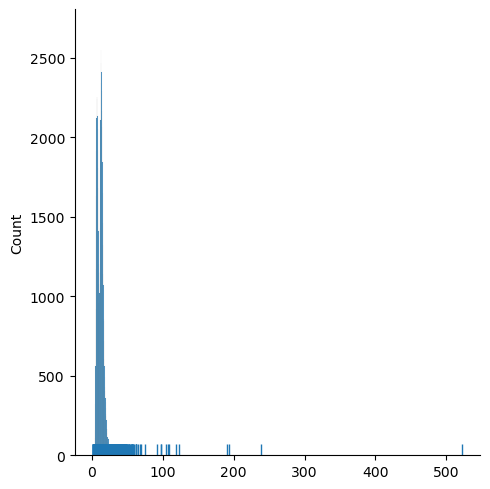

In [28]:
# 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(moving_time_list, rug=True)
plt.show()

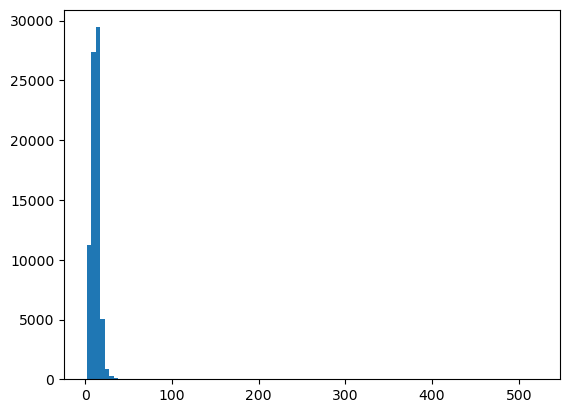

In [33]:
n, bins, patches = plt.hist(moving_time_list, bins=100)
plt.show()

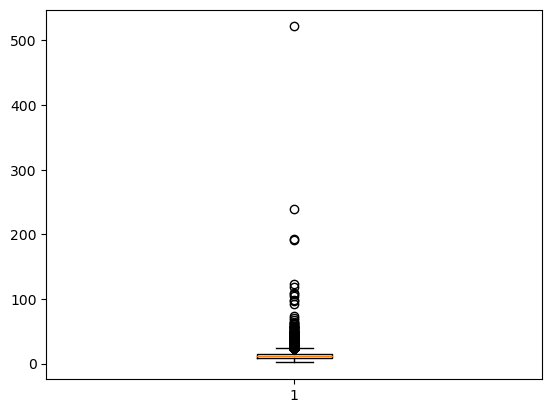

In [34]:
# 박스 플롯 - 근데 이거는 한 곳에서 나온 경우가 아니기 떄문에 박스 플롯을 통하여 이상치라고 하면 안됨
plt.boxplot(moving_time_list)
plt.show()